## Введение

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

- 	Name — название игры
- 	Platform — платформа
- 	Year_of_Release — год выпуска
-   Genre — жанр игры
- 	NA_sales — продажи в Северной Америке (миллионы проданных копий)
- 	EU_sales — продажи в Европе (миллионы проданных копий)
- 	JP_sales — продажи в Японии (миллионы проданных копий)
- 	Other_sales — продажи в других странах (миллионы проданных копий)
- 	Critic_Score — оценка критиков (максимум 100)
- 	User_Score — оценка пользователей (максимум 10)
- 	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

##  Задача
Выявить определяющие успешность игры закономерности. 
Дать рекомендации компании по развитию наиболее популярного продукта для планирования рекламных кампаний

#### Импорт библиотек 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
display(pd)
import matplotlib.pyplot as plt 
import math

In [7]:
pd.set_option('mode.chained_assignment', None)

In [8]:
!pip install seaborn -U

### 1. Открытие файла и получение общей информации

In [9]:
data = pd.read_csv('/datasets/games.csv', sep = ',')

In [10]:
data.shape

(16715, 11)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [12]:
display (data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод: Для исследования предложена таблица данных, в которой 11 колонок и 16715 строк, присутвуют типы данных, такие как: float64, object. Видны пропуски данных в виде NaN, дубликатов нет. Потребуется замена типов данных, заполнение пропусков, изменение названий столбцов. 

### 2.  Подготовка данных

#### 2.1 Переименование столбцов

In [13]:
 data.columns = data.columns.str.lower()

In [14]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [15]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Заменим значения tbd и nan на числовые

In [16]:
data = data.replace('tbd',np.nan)

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### Заполнение пропусков

In [19]:
pd.to_numeric(data['user_score'], errors = 'coerce')
pd.to_numeric(data['critic_score'], errors = 'coerce')

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

Оставим пропущенные значения в user_score и critic_score, ткт.  они. скорее всего возникли потому что эти игры не оценивались критиками и игроками или слишком старые. Будем работать с теми данными, что имеются.

In [20]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [21]:
data = data.dropna(subset = ['year_of_release','genre'])
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

#### 2.2 Измененение типов данных

Заменим типа данных в столбце year_of_release, т.к. это год выпуска игры и он должен быть Int и округленным.

In [22]:
data['year_of_release'] = data['year_of_release'].round(0)
data['year_of_release'] = data['year_of_release'].astype ('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


Заменим типа данных в столбце user_score на float64, чтобы продолжать работу далее с числовым типом данных и чтобы снизить обьем затрачиваемой памяти. 

In [23]:
data['user_score'] = data['user_score'].astype ('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


#### 2.3 Суммы продаж во всех регионах

In [24]:
data ['total_sales'] = data.loc[:, ['na_sales', 
                                    'eu_sales',
                                    'jp_sales',
                                    'other_sales' ]].sum(axis = 1).astype('float64')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Нашли суммарное значение всех продаж и записали в отдедльный столбец.  Просуммировали по строкам с параметром axis = 1 

### 3. Проведите исследовательский анализ данных
#### 3.1 Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


In [27]:
data_sum_game_year = data.pivot_table(index = 'year_of_release',
                             values = 'name',
                             aggfunc = ['count'])
data_sum_game_year.columns = ['count']
display (data_sum_game_year.head())

,count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


Text(0, 0.5, 'Кол-во игр')

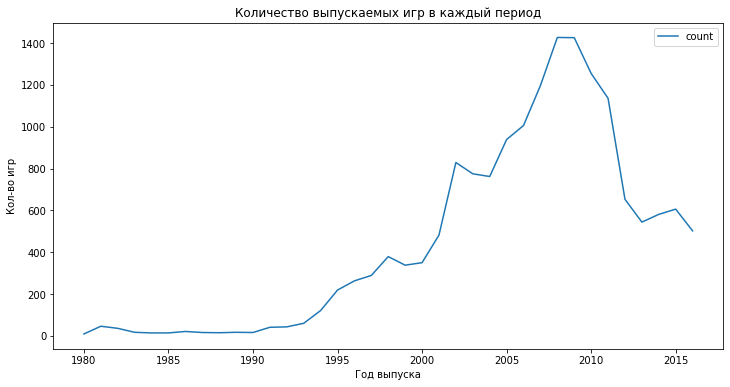

In [28]:
data_sum_game_year.plot(kind='line', figsize=(12, 6))
plt.title ('Количество выпускаемых игр в каждый период')
plt.xlabel ('Год выпуска')
plt.ylabel ('Кол-во игр')

На сводной таблице мы видим, что в меньше всего игр выпускалось в перод с 1980 по 1994 годы, потом был резки скачок до 1006 игр в год в 2006 году.Выпуски были столь же активными до 2011 года, а потомпошли на спад. и в 2012-2016 выпускалось примерно п 500 игр в год.  Для исследования в бОльшей степени нас будут интересовать данные за последние 15 лет, т.к. по ним больше сущаствоующих платформ, а не исчезнувших, а это подтверждает утверждение о том, что в расчет их брать необязательно

#### 3.2 Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

<div class="alert alert-info">
1.Посчитать суммарные продажи по каждой платформе за все время.

 Выделим платформы с наибольшими суммарными продажами, возьмем для изучения первые 10 строчек с максимальным количеством прибыльности

In [29]:
top_10_platforms = data.pivot_table(index=['platform'],
                            values = 'total_sales',
                            aggfunc = 'sum').sort_values (by = 'total_sales', ascending = False)
top_10_platforms.columns = ['sum']
top_10_platforms = top_10_platforms[:9]
display (top_10_platforms.head (10))

,sum
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


<div class="alert alert-info">
2.Выбрать самые доходные платформы.

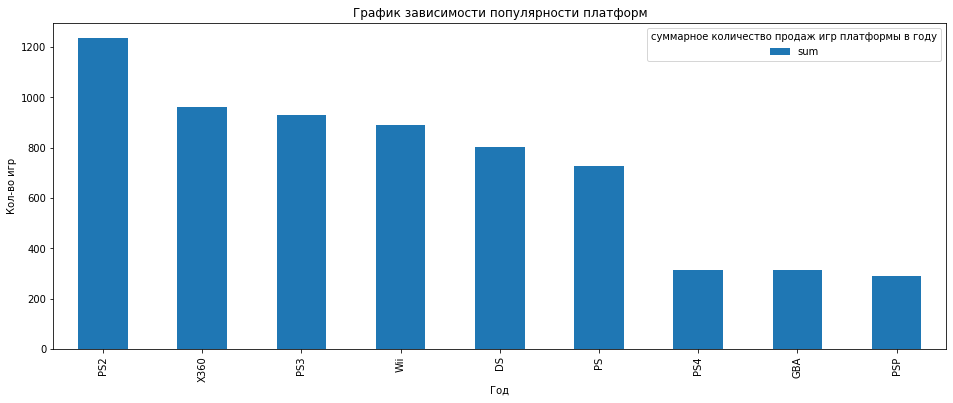

In [30]:
top_10_platforms.plot(kind='bar', figsize=(16, 6))
plt.title ('График зависимости популярности платформ')
plt.xlabel ('Год')
plt.ylabel ('Кол-во игр')
plt.legend(title = "суммарное количество продаж игр платформы в году")

Выберем 5 самых доходных платформ

In [31]:
lst_top5_1 = ['PS2','X360','PS3','Wii','DS','PS']
top_5_platforms = data.query("platform in @lst_top5_1")


In [32]:
top_5_platforms_1=top_5_platforms.pivot_table(index='year_of_release',
                           columns='platform',
                           values = 'name', 
                           aggfunc = 'count')


<div class="alert alert-info">
3.Построить график, отражающий продажи этих платформ по годам.

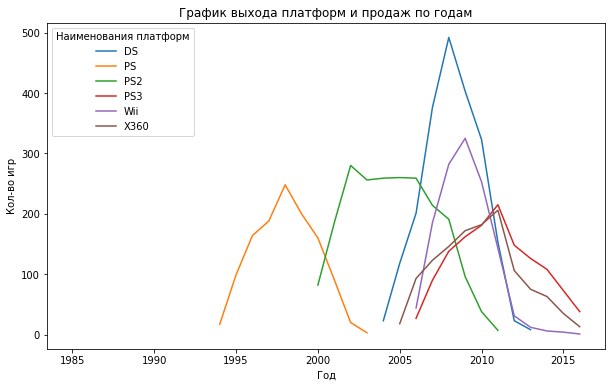

In [33]:
top_5_platforms_1.plot(kind='line', figsize=(10, 6))
plt.title ('График выхода платформ и продаж по годам')
plt.xlabel ('Год')
plt.ylabel ('Кол-во игр')
plt.legend(title = "Наименования платформ")

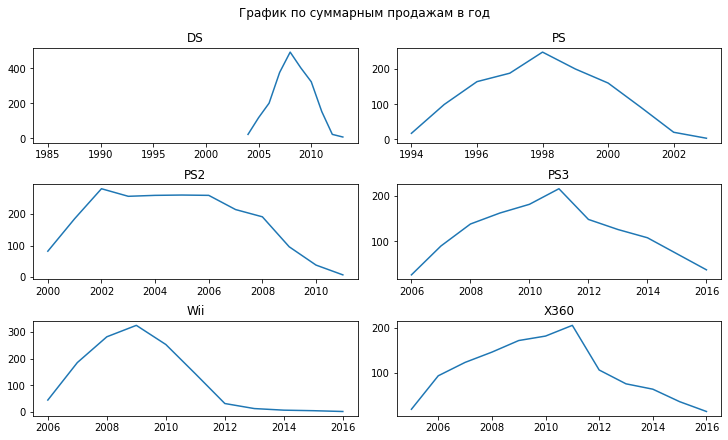

In [34]:
l = len(top_5_platforms_1.columns)
fig, axes = plt.subplots(nrows=math.ceil(l/2), ncols=2,figsize = (10,6), gridspec_kw = dict(left=0.1, right=0.9,bottom=0.1, top=1.9), constrained_layout=True)
fig.suptitle('График по суммарным продажам в год')
n = 0
for ax in axes.flat:   
    if l > n:
        ax.set(title=top_5_platforms_1.columns[n])
        ax.plot(top_5_platforms_1 [top_5_platforms_1.columns[n]])      
        n += 1
plt.show()

<div class="alert alert-info">
4. Из этого графика сделать вывод о среднем времени жизни платформы.

Графики позволяют определить время существования каждой из популярных платформ:
- DS 10 лет
- PS 10 лет
- PS2 14 лет
- Wii 10 лет
- PS3 10 лет
- X360 12 лет.
- В среднем платформы существуют 10 лет

#### 3.3  Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
-  Не учитывайте в работе данные за предыдущие годы.
-  Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

 
Отделим данные начиная с 2011 года, начиная с этого периода у нас остаются те платформы, которые наиболее вероятно "доживут" до 2017 года

In [39]:
data_prediction = data[data['year_of_release'] >= 2013]
display('Список платформ для анализа:',data_prediction['platform'].unique())

'Список платформ для анализа:'

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

<AxesSubplot:xlabel='year_of_release'>

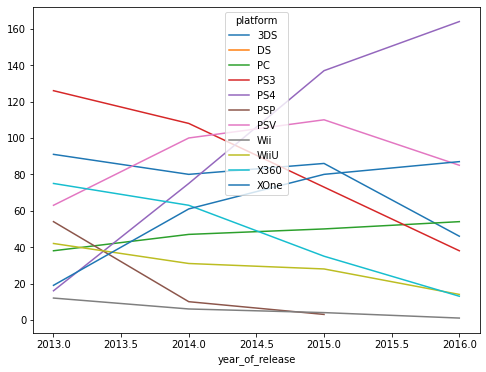

In [40]:
top_platfoms_actually = data_prediction.pivot_table (index = 'year_of_release',
                                                    columns='platform',
                                                     values = 'name', 
                                                     aggfunc = 'count')

top_platfoms_actually.plot(kind='line', figsize=(8, 6))

Наиболее популярной платформой, приносящей прибыль, является PS4, также на подьеме находится PC
Платформы PCV,3DS,PS3,WiiU,Wii,X360 показывают небольшое падение прибыли в в 2016 году по сравнению с предыдущими, но также являются важной частью данных для прогноза на 2017 год.

 #### 3.4 Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

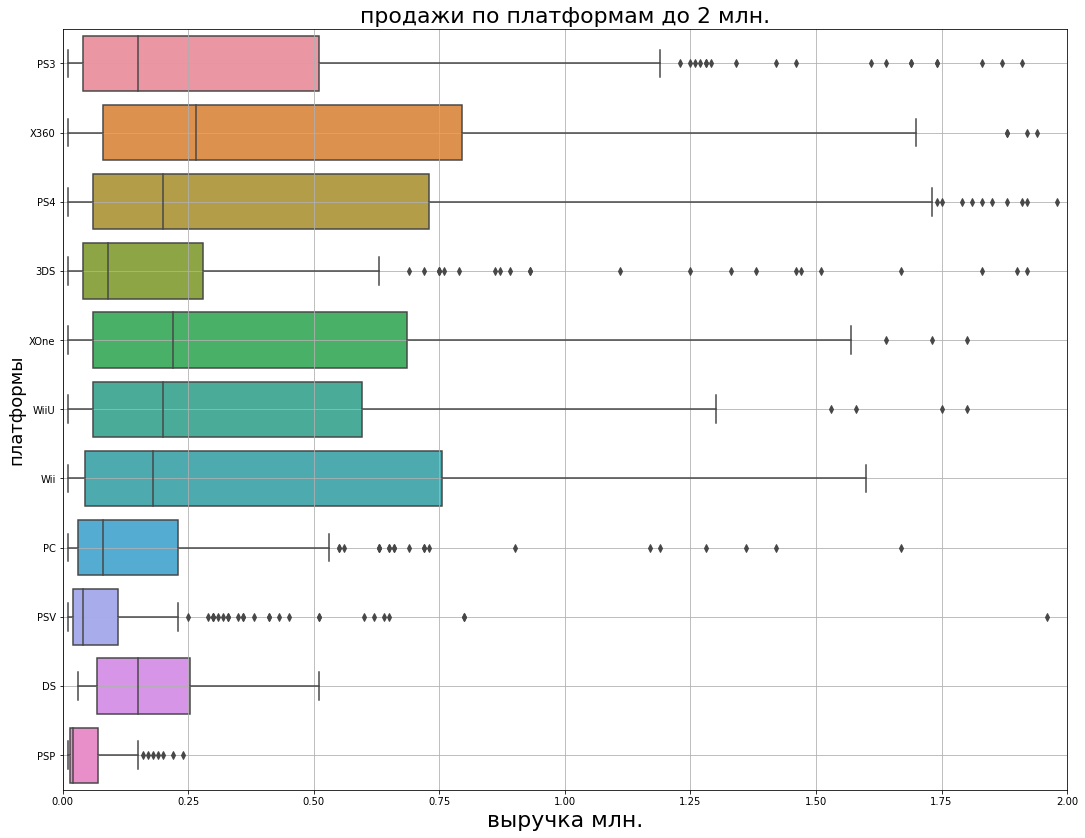

In [41]:
plt.figure(figsize=(18,14))
ax = sns.boxplot(y="platform",
                 x="total_sales",
                 data = data_prediction,
                 orient ='h'
)

ax.grid(which='both')
plt.xlabel('выручка млн.',fontsize  = 22)
plt.ylabel('платформы',fontsize  = 18)
plt.title ('продажи по платформам до 2 млн.',fontsize =22)
ax.set(xlim=(0,2))

plt.show()

In [42]:
top_platfoms_actually.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000000,1.0,4.000000,4.000000,4.00000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,75.750000,8.0,47.250000,86.250000,98.00000,22.333333,89.500000,5.750000,28.750000,46.500000,61.750000
std,20.336748,NaN,6.800735,38.973281,66.15638,27.646579,20.436895,4.645787,11.528949,27.922512,30.543685
min,46.000000,8.0,38.000000,38.000000,16.00000,3.000000,63.000000,1.000000,14.000000,13.000000,19.000000
25%,71.500000,8.0,44.750000,64.250000,60.25000,6.500000,79.500000,3.250000,24.500000,29.500000,50.500000
50%,83.000000,8.0,48.500000,90.500000,106.00000,10.000000,92.500000,5.000000,29.500000,49.000000,70.500000
75%,87.250000,8.0,51.000000,112.500000,143.75000,32.000000,102.500000,7.500000,33.750000,66.000000,81.750000
max,91.000000,8.0,54.000000,126.000000,164.00000,54.000000,110.000000,12.000000,42.000000,75.000000,87.000000


После анализа графика с усами мы видим,  что основной доход платформ приносят выбросы.Они же являются хитами  платформ.Наибольшее количество хитов в акутальный период вышло на платформах PS3 и PS4

 #### 3.5 •	Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [43]:
data_prediction_PS3  = data_prediction[data_prediction['platform'].isin(['PS3'])]
display (data_prediction_PS3.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

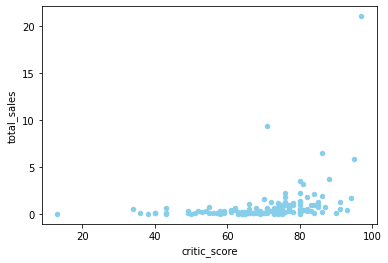

In [44]:
data_prediction_PS3.plot(x ='critic_score', y='total_sales', kind='scatter',color = 'skyblue')

In [45]:
r1 = data_prediction_PS3['critic_score'].corr(data_prediction_PS3['total_sales'])
print('Коэффициент корреляции Пирсона между оценками критиков и продажами для платформы PS3:',r1)

Коэффициент корреляции Пирсона между оценками критиков и продажами для платформы PS3: 0.3342853393371919


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

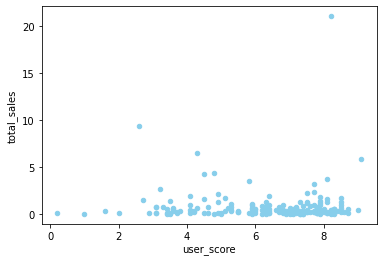

In [46]:
data_prediction_PS3.plot(x ='user_score', y='total_sales', kind='scatter',color = 'skyblue')

In [47]:
r = data_prediction_PS3['user_score'].corr(data_prediction_PS3['total_sales'])
print('Коэффициент корреляции Пирсона между оценками пользователей и продажами для платформы PS3:',r)

Коэффициент корреляции Пирсона между оценками пользователей и продажами для платформы PS3: 0.0023944027357566925


После расчета коэффицента корреляции мы видим, что на платформе PS3 практически отсувует зависимость между продажами и оценками пользователей (0.01) и наблюдается слабая связь зависимость между продажами и оценками  критиков (0.38)

 #### 3.6 •	Соотнесите выводы с продажами игр на других платформах.

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

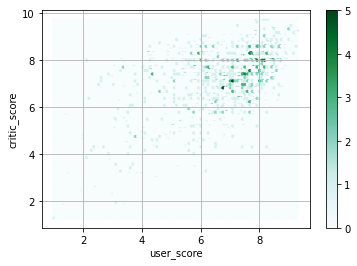

In [48]:
data_prediction['critic_score'] = data_prediction['critic_score']/10
data_prediction.plot(x ='user_score', y='critic_score',kind = 'hexbin',sharex = False, grid = True )

In [49]:
r = data_prediction['user_score'].corr(data_prediction['total_sales'])
print('Коэффициент корреляции Пирсона между оценками пользователей и оценками критиков по всем платформам:', r)

Коэффициент корреляции Пирсона между оценками пользователей и оценками критиков по всем платформам: -0.0026078133545982744


Сформировав график hitmap мы видим, что в целом совпадают оценки критиков и пользователей . Мы привели оценки критиков к тому же разряду, что и оценки пользователей (поделила на 10) и из этого мы видим, что наиболее популярные игры имеют оценку 8 у критиков и. пользователей и очень небольшое смещение есть в играх, которые получили высокие оценки от критиков и оценки более низкие от пользователей. Коэффицент корреляции показывает, что зависимости практически нет между оценками критиков и пользотвателей (0.03)

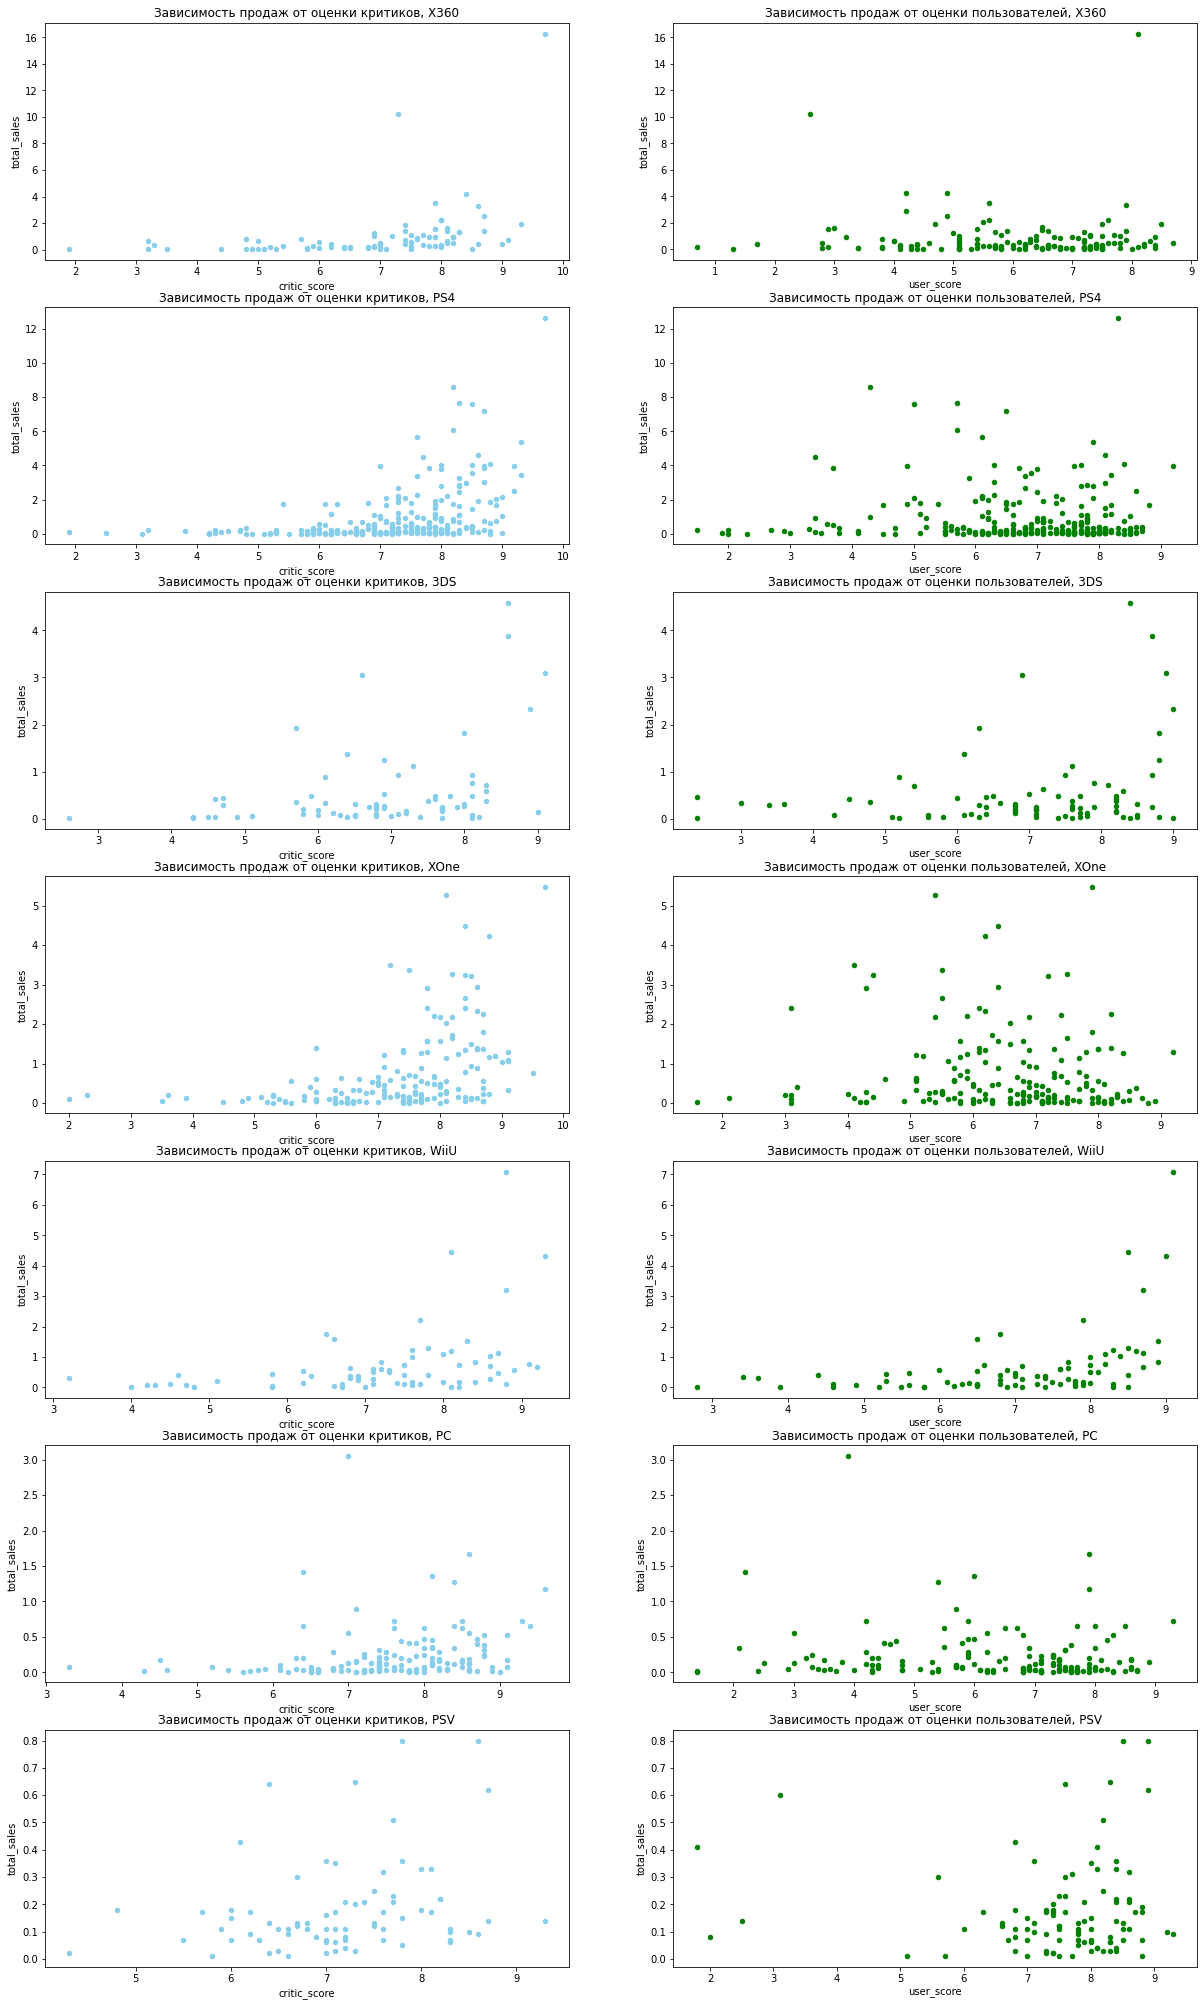

In [50]:
platforms = data_prediction[~data_prediction['platform'].isin(['PS3', 'PSP', 'Wii'])]['platform'].unique()
fig, axs = plt.subplots(7, 2, gridspec_kw = dict(left=0.1, right=0.9,bottom=0.1, top=1.9), figsize=(20, 15))
for i in range(7):
    sc_g = data_prediction[data_prediction['platform'] == platforms[i]]
    
    sc_g.plot(
      kind='scatter',
      x='critic_score',
      y='total_sales',
      title = 'Зависимость продаж от оценки критиков, {}'.format(platforms[i]),
      ax=axs[i, 0],color = 'skyblue'
      )
 
    sc_g.plot(
      kind='scatter',
      x='user_score',
      y='total_sales',
      title = 'Зависимость продаж от оценки пользователей, {}'.format(platforms[i]), 
      ax=axs[i, 1],color = 'green'
      )
plt.show()

Видим, что по другим платфорам картина схожая -- низкая зависимоть продаж от оценок пользователей и небольшая зависимость в некоторых платформах между оценками критиков и продажами.



 #### 3.7 Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294
Fighting,0.441375
Action,0.420196
Misc,0.405290
Simulation,0.350968


<AxesSubplot:xlabel='genre'>

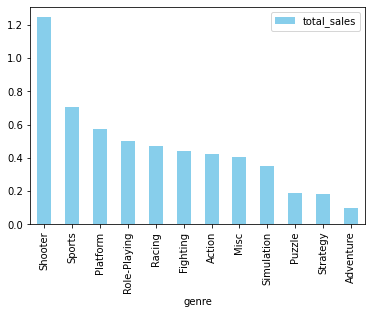

In [51]:
top_genre = data_prediction.pivot_table (index = 'genre',
                                        values = 'total_sales', 
                                        aggfunc = 'mean').sort_values(by = 'total_sales',ascending = False)

display (top_genre)
top_genre.plot( kind='bar',color = 'skyblue')

На диаграмме мы видим,  что самым прибыльным оказался жанр Shooter. Самые низкие продажиу жанров Puzzle,Adventure,Strategy.

### 4 Составьте портрет пользователя каждого региона

#### 4.1 Определите для пользователя каждого региона (NA, EU, JP):
•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.


In [52]:
display (data_prediction.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62


,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


Text(0, 0.5, 'Продажи, млн')

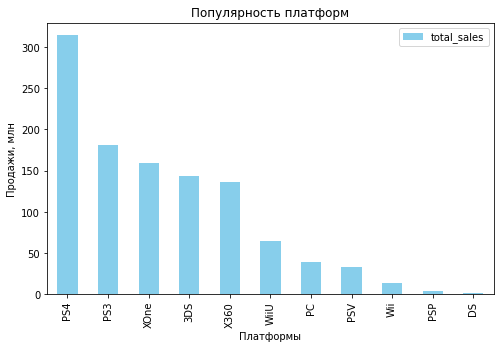

In [53]:
top_5_platfoms = data_prediction.pivot_table (index = 'platform',
                                                     values = 'total_sales', 
                                                     aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False)
display(top_5_platfoms.head())

top_5_platfoms.plot(kind='bar', figsize=(8, 5),color='skyblue')
plt.title ('Популярность платформ')
plt.xlabel ('Платформы')
plt.ylabel ('Продажи, млн')

In [54]:
lst_top5 = ['PS3','X360','PS4','3DS','XOne']
data_prediction_top5 = data_prediction.query("platform in @lst_top5")

Text(0, 0.5, 'Total sales, million of copies')

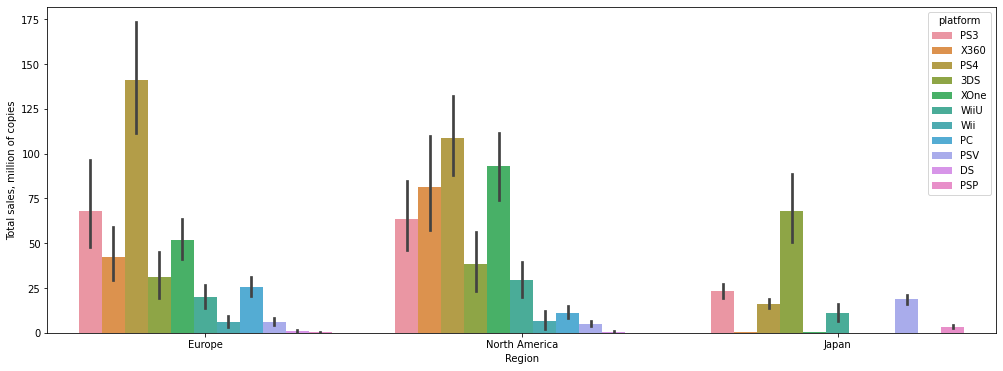

In [55]:
# создадим специальную таблицу
# через функцию melt()
# она позволит сделать названия столбцов значениями столбцов
# это позволит сделать группировку на графике
sales_region_platform_melt = pd.melt(data_prediction, id_vars=['platform'], value_vars=['eu_sales', 'na_sales', 'jp_sales'])

# переименуем колонки
sales_region_platform_melt.columns = ['platform', 'region', 'sales']

# заменим значения регионов в новой колонке 
sales_region_platform_melt.replace({'eu_sales': 'Europe', 'jp_sales': 'Japan', 'na_sales': 'North America'}, inplace=True)

plt.figure(figsize=(17,6))

# построим столбчатый график, который отражает сумму значений
sns.barplot(data = sales_region_platform_melt, x='region', y='sales', hue='platform', estimator=sum)
sns.set_style("darkgrid")

plt.xlabel('Region')
plt.ylabel('Total sales, million of copies')

В Европе и Америке наиболее популярная платформа PS4.В Японии абсолютным лидером является платформа 3DS в Европе и Америке эта платформа показывает довольно средние результаты

In [57]:
def res(platform):
    data_prediction_top5[data_prediction_top5['platform'] == platform['platform']]['total_sales'].sum()
    sales = data_prediction_top5[data_prediction_top5['platform'] == platform['platform']]['total_sales'].sum() / data_prediction_top5['total_sales'].sum()
    return sales
data_prediction_top5['world_part'] = data_prediction_top5.apply(res, axis=1)
display(data_prediction_top5.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,world_part
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,9.7,8.2,M,21.05,0.194055
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,9.7,8.1,M,16.27,0.146320
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,0.336000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60,0.153218
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,9.7,8.3,M,12.62,0.336000


In [58]:
data_pivot_top5= data_prediction_top5.pivot_table (index = 'platform', 
                                                values = ['na_sales','eu_sales','jp_sales','total_sales','world_part'],
                                                     aggfunc = 'sum')
display(data_pivot_top5)

,eu_sales,jp_sales,na_sales,total_sales,world_part
platform,,,,,
3DS,30.96,67.81,38.20,143.25,46.425172
PS3,67.81,23.35,63.50,181.43,66.949056
PS4,141.09,15.96,108.74,314.14,131.712067
X360,42.52,0.51,81.66,136.80,27.215436
XOne,51.59,0.34,93.12,159.32,42.090444


In [59]:
data_pivot_top5['world_part'] = (
    data_pivot_top5['total_sales'] / data_prediction['total_sales'].sum())
display(data_pivot_top5.sort_values(by = 'world_part',ascending = False))

,eu_sales,jp_sales,na_sales,total_sales,world_part
platform,,,,,
PS4,141.09,15.96,108.74,314.14,0.288020
PS3,67.81,23.35,63.50,181.43,0.166344
XOne,51.59,0.34,93.12,159.32,0.146073
3DS,30.96,67.81,38.20,143.25,0.131339
X360,42.52,0.51,81.66,136.80,0.125425


 Самой популярной в мире платформой является PS4, доля продаж составляет почти 30 процентов от значений продаж  по всему миру.

#### 4.2 Самые популярные жанры (топ-5). Поясните разницу.

,total_sales
genre,
Shooter,1.245882
Sports,0.703972
Platform,0.576081
Role-Playing,0.499623
Racing,0.469294


<AxesSubplot:xlabel='genre'>

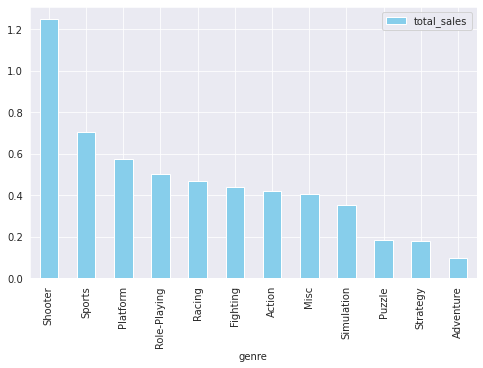

In [60]:
top_5_genre = data_prediction.pivot_table (index = 'genre',
                                                     values = 'total_sales', 
                                                     aggfunc = 'mean').sort_values(by = 'total_sales',ascending = False)
display(top_5_genre.head())

top_5_genre.plot(kind='bar', figsize=(8, 5),color='skyblue')

In [61]:
data_pivot_top5_region= data_prediction_top5.pivot_table (index = ['genre'], 
                                                values = ['na_sales','eu_sales','jp_sales'],
                                                     aggfunc = 'sum')
display(data_pivot_top5_region)

,eu_sales,jp_sales,na_sales
genre,,,
Action,105.06,32.82,113.72
Adventure,6.97,3.17,6.41
Fighting,6.88,5.98,12.09
Misc,13.58,4.95,20.46
Platform,9.07,2.34,8.91
Puzzle,0.61,0.91,0.21
Racing,17.04,0.93,9.64
Role-Playing,32.70,42.50,42.39
Shooter,79.99,5.02,103.89


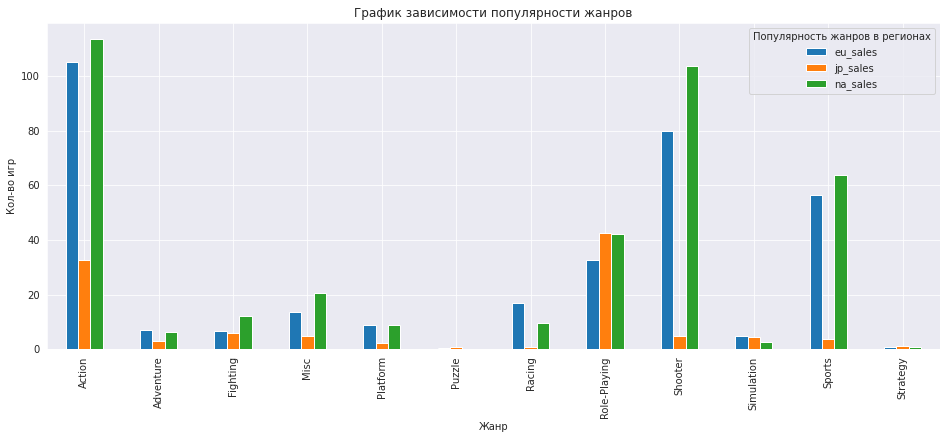

In [62]:
data_pivot_top5_region.plot(kind='bar', figsize=(16, 6))
plt.title ('График зависимости популярности жанров')
plt.xlabel ('Жанр')
plt.ylabel ('Кол-во игр')
plt.legend(title = "Популярность жанров в регионах")

В Америке большей популярностью пользуются жарны Action,Shooter,Sports.В Европе ситуация такая  же,а 
вот в Японии наиболее популярные жанры Role-Playing и Action

#### 4.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [63]:
pd.to_numeric(data['rating'], errors = 'coerce')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16710   NaN
16711   NaN
16712   NaN
16713   NaN
16714   NaN
Name: rating, Length: 16444, dtype: float64

Заменим все пропуски в столбце рейтинга на Z. Что означет "рейтинг не определен"

In [64]:
data_prediction['rating'] = data_prediction['rating'].fillna(value = 'Z')

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79
Z,78.91,85.05,89.42


<AxesSubplot:xlabel='rating'>

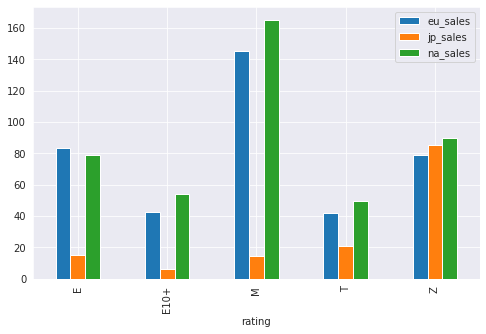

In [65]:
ESRB_sale = data_prediction.pivot_table (index = 'rating',
                                                     values = ['na_sales','eu_sales','jp_sales'],
                                                     aggfunc = 'sum')
display(ESRB_sale.head())

ESRB_sale.plot(kind='bar', figsize=(8, 5))

Мы видим на диаграмме, что наиболее популярным жанром в Америке и Европе является категория М -- «Mature»(для взрослых) , далее Е --  «Everyone» (для всех) , Т -- «Teen» (подростки). Стабильный доход приносят игры без рейтинга. В Японии,например,данная категория игр значительно опережает другие.

### 5 Проверьте гипотезы


#### 5.1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

#### Нулевая гипотеза: средний рейтинг пользователй платформ XOne и PC равен.
#### Альтернативная гипотеза: средний рейтинг пользователй платформ XOne и PC не равен.

In [66]:
lst_top2 = ['XOne','PC']
data_rating = data_prediction.query("platform in @lst_top2")

In [67]:
data_rating_platform = data_rating.pivot_table(index = 'platform', 
                 values= ['user_score'], 
                 aggfunc= ['mean', 'var','std'])
display (data_rating_platform.round().head())

,mean,var,std
,user_score,user_score,user_score
platform,,,
PC,6.0,3.0,2.0
XOne,7.0,2.0,1.0


Так как дисперсии не сильно отличаются,то в стат. анализе будет выбирать параметр equal_var = True

In [68]:
data_rating = data_rating.dropna(subset=['platform', 'user_score'])

In [69]:
data_PC = data_rating.query ('platform == "PC"')
data_XOne = data_rating.query ('platform == "XOne"')

In [70]:
from scipy import stats as st
sample_1 = data_PC ['user_score'] # данные пользовательского рейтинга платформы PC
sample_2 = data_XOne['user_score'] # данные пользовательского рейтинга платформы XOne

print ('Средний пользовательский рейтинг платформы PC:', data_PC ['user_score'].mean())
print (data_XOne ['user_score'].mean())


alpha = .05 #выберем альфа 5%
results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

Средний пользовательский рейтинг платформы PC: 6.2696774193548395
6.521428571428572
p-значение:  0.14012658403611647
Не отвергаем нулевую гипотезу


Вывод стат. анализа: средний рейтинг пользователй платформ XOne и PC равен

#### 5.2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

#### Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports равны.
#### Альтернативная гипотеза:  cредние пользовательские рейтинги жанров Action и Sports разные.¶

In [71]:
lst_top3 = ['Action','Sports']
data_genre = data_prediction.query("genre in @lst_top3")


In [72]:
data_genre_mean = data_genre.pivot_table(index = 'genre', 
                 values= ['user_score'], 
                 aggfunc= ['mean', 'var','std'])
display (data_genre_mean.round().head())

,mean,var,std
,user_score,user_score,user_score
genre,,,
Action,7.0,2.0,1.0
Sports,5.0,3.0,2.0


In [73]:
data_genre = data_genre.dropna(subset=['genre', 'user_score'])

In [74]:
data_action = data_rating.query ('genre == "Action"')
data_sports = data_rating.query ('genre == "Sports"')

In [75]:
from scipy import stats as st
sample_1 = data_action ['user_score'] # данные пользовательского рейтинга жанра Аction
sample_2 = data_sports['user_score'] # данные пользовательского рейтинга жанра Sports
print (data_action ['user_score'].mean())
print (data_sports ['user_score'].mean())

alpha = .05 #выберем альфа 5%
results = st.ttest_ind(sample_1, sample_2, equal_var = True)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не отвергаем нулевую гипотезу')

6.665656565656565
5.370212765957447
p-значение:  1.7605327341054213e-07
Отвергаем нулевую гипотезу


Вывод стат. анализа:  Средние пользовательские рейтинги жанров Action и Sports разные

### 6 Вывод

Компании следует усилить развитие направления игр жанра Shooter и Sports катеогории для взрослых или без категории.
На платформах PS3,PS4,XOne в регионах Северная Америка и Европа и 3DS в Японии.